# Table of Contents

<div>
    <h3><a href="#Introduction">1. Introduction</a></h3>
    <ul>
        <li><a href="#Overview">1.1 Project Overview</a></li>
        <li><a href="#Objective">1.2 Objective</a></li>
        <li><a href="#DataSource">1.3 Data Source</a></li>
    </ul>
    <h3><a href="#Libraries">2. Import Libraries</a></h3>
    <h3><a href="#LoadCleanData">3. Load and Clean Data</a></h3>
    <ul>
        <li><a href="#LoadData">3.1 Load Data</a></li>
        <li><a href="#DataReview">3.2 Initial Data Review</a>
            <ul>
                <li><a href="#DataStructure">3.2.1 Data Structure Review</a></li>
                <li><a href="#StatSummaries">3.2.2 Basic Statistical Summaries</a></li>
                <li><a href="#Duplicate">3.2.3 Duplicate Check</a></li>
                <li><a href="#Missing">3.2.4 Missing Data Check</a></li>
                <li><a href="#CatConsistency">3.2.5 Category Consistency Check</a></li>
            </ul>
        </li>
    </ul>
    <h3><a href="#EDA">4. Exploratory Data Analysis</a></h3>
    <ul>
        <li><a href="#UnivariateContinuous">4.1 Univariate Analysis - Continous Variables</a>
        </li>
        <li><a href="#UnivariateCategorical">4.2 Univariate Analysis - Categorical Variables</a>
        </li>
        <li><a href="#BivariateTarget">4.3 Bivariate Analysis - Features and Target</a>
        </li>
        <li><a href="#BivariateCorrelation">4.4 Bivariate Analysis - Feature Correlation</a>
        </li>
        <li><a href="#Multivariate">4.5 Univariate Analysis - Feature Interactions with Target</a>
        </li>
    </ul>
    <h3><a href="#PreprocessData">5. Preprocessing</a></h3>
    <ul>
        <li><a href="#Split">5.1 Train-Test Split</a>
        </li>
        <li><a href="#FeatureScaling">5.2 Feature Scaling</a>
        </li>
    </ul>
    <h3><a href="#FeatureEngineering">6. Feature Engineering</a></h3>
    <ul>
        <li><a href="#NewVariables">6.1 Create New Features</a></li>
<!--         <li><a href="#ConvertCategorical">5.2 Convert to Categorical</a></li> -->
        <li><a href="#Encoding">6.2 One Hot Encoding</a></li>
        <li><a href="#Transformations">6.3 Feature Transformations</a></li>
<!--         <li><a href="#FEPipeline">5.5 Feature Engineering Pipeline</a></li> -->
    </ul>
    <h3><a href="#ModelSelection">7. Model Selection</a></h3>
    <ul>
        <li><a href="#AlgorithmSelection">7.1 Algorithm Selection</a></li>
        <li><a href="#ModelSelection2">7.2 Model Selection</a></li>
        <ul>
            <li><a href="#Pipelines">7.2.1 Pipelines and Datasets</a></li>
            <li><a href="#ModelEvaluation">7.2.2 Top 3 Model Evaluation and Selection</a></li>
        </ul>
        <li><a href="#Tuning">7.3 Hyperparameter Tuning</a></li>
        <ul>
            <li><a href="#FitEvaluate">7.3.1 Function to Fit and Evaluate Model with Cross-validation Data</a></li>
            <li><a href="#ControlModel">7.3.2 Control Model</a></li>
            <li><a href="#EstimatorsLearning">7.3.3 Fine Tuning n_estimators and learning_rate</a></li>
            <li><a href="#DepthL2">7.3.4 Fine Tuning depth and l2_leaf_reg</a></li>
        </ul>
    </ul>
    <h3><a href="#Predicting">8. Predictions</a></h3>
</div>

<a id='Introduction'></a>
# 1. Introduction

<a id='Overview'></a>
## 1.1 Project Overview

For this Kaggle competition, the objective is to predict customer churn within the banking sector, focusing on whether customers continue or terminate their accounts. The aim is to create a model that can predict the probability of a customer leaving the bank. This project is pivotal for strategic customer retention efforts, allowing for targeted interventions to enhance customer satisfaction and loyalty.

The task is to leverage a machine learning model to parse through customer data and predict churn probabilities. The model's performance will be evaluated based on the area under the Receiver Operating Characteristic (ROC) curve, assessing the model's ability to distinguish between the churned and retained customer categories across all possible thresholds. This measure will offer insights into the model's effectiveness at ranking predictions correctly and its viability for practical use in diverse real-world scenarios.

<a id='Objective'></a>
## 1.2 Objective

The primary objective of this project is to predict the probability of a customer exiting the bank's services. The challenge is to employ machine learning techniques to process and analyze the data, ultimately developing a robust model capable of predicting churn. The evaluation metric, the area under the ROC curve, will guide the model optimization efforts, ensuring a focus on improving both the sensitivity and specificity of the predictions.

<a id='DataSource'></a>
## 1.3 Data Source

The dataset for this competition comprises both training and test sets, generated from a deep learning model trained on real-world customer churn data. 

The training dataset (train.csv) includes various customer attributes along with the binary target variable Exited, indicating whether a customer has churned.

The test dataset (test.csv) contains similar customer attributes but requires participants to predict the probability of Exited.

Key attributes in the dataset include Customer ID, Surname, Credit Score, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, and the target, Exited. 

<a id='Libraries'></a>
# 2. Import Libraries and Helpers

In [1]:
# Python file with functions to build charts 
%run Charts_for_EDA.ipynb

# Data Manipulation and Analysis  
import pandas as pd
import numpy as np

# Visualization  
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and Feature Engineering 
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from scipy.stats import randint, boxcox, yeojohnson
from scipy import stats


# Model Building and Evaludation 
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import catboost as cb
from catboost import CatBoostClassifier, Pool
from category_encoders import CatBoostEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, r2_score, classification_report, roc_auc_score, roc_curve


# Utility and Configuration 
import warnings
warnings.filterwarnings('ignore')
import logging 




<a id='LoadCleanData'></a>

# 3. Load and Clean Data

<a id='LoadData'></a>

## 3.1 Load Data

In [2]:
df_train = pd.read_csv("/Kaggle/Bank Churn - Binary Classification/Raw Data/train.csv").astype({'IsActiveMember' : np.uint8, 'HasCrCard' : np.uint8})
df_test = pd.read_csv("/Kaggle/Bank Churn - Binary Classification/Raw Data/test.csv").astype({'IsActiveMember' : np.uint8, 'HasCrCard' : np.uint8})

In [3]:
#Creating Copies
df_train_copy = df_train.copy()
df_test_copy = df_test.copy()

<a id='DataReview'></a>

## 3.2 Initial Data Review

<a id='DataStructure'></a>

### 3.2.1 Data Structure Review

In [4]:
display(df_train_copy.head())
display(df_test_copy.head())

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1,0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1,1,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1,0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1,1,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1,1,15068.83,0


,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0,1,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1,0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1,0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1,0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1,0,139431.00


Insights & Observations
- id and CustomerId columns are unique identifier and will not be used as predictors
- Columns are in the same order in the train and test sets (minus the target variable in test) 
- At first glance, columns look to be in the same format across both datasets
- Seems to be some incorrect data in the Surname column in the test set ("K?") but we will not be using Surname as a predictor and will be using id or CustomerId to identify unique customers

In [5]:
display(df_train_copy.dtypes.to_frame().T)
display(df_test_copy.dtypes.to_frame().T)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,int64,int64,object,int64,object,object,float64,int64,float64,int64,uint8,uint8,float64,int64


,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,int64,int64,object,int64,object,object,float64,int64,float64,int64,uint8,uint8,float64


Insights & Observations
- Data has both continuous and categorical features 
- Categorical features include: Geography and Gender
- Categorical features will need to be encoded - since there are not a ton of classes in each we can use one-hot encoding
- Feature data types in training and testing set are the same

<a id='StatSummaries'></a>
### 3.2.2 Basic Statistical Summaries

In [6]:
display(df_train_copy.drop(columns = ['id', 'CustomerId'], axis = 1).describe())
display(df_test_copy.drop(columns = ['id', 'CustomerId'], axis = 1).describe())

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000
mean,656.530789,38.122205,4.996637,55333.611354,1.553321,0.753043,0.495233,112315.147765
std,80.315415,8.861550,2.806148,62788.519675,0.544714,0.431244,0.499980,50277.048244
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000
25%,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74440.325000
50%,660.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117832.230000
75%,710.000000,42.000000,7.000000,120145.605000,2.000000,1.000000,1.000000,154631.350000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000


Insights & Observations
- The mean and standard deviation between the train and test set are very similar 
- The distribution of each feature appears to be very similar between the train and test set 
- The value ranges of features vary quite a bit - will likely need to scale the features depending on the algorithm selected
- HasCrCard and IsActiveMember appear to be binary - possibly convert to categorical variables
- Given the geographies are European countries, Balance and EstimatedSalary are likely in Euros
- Age and Tenure both seem to be in years

<a id='Duplicate'></a>
### 3.2.3 Duplicate Check

In [7]:
# Checking for duplicates 
duplicate_count_train = df_train_copy.duplicated().sum()
duplicate_count_test = df_test_copy.duplicated().sum()

print('Train: ', duplicate_count_train)
print('Test: ', duplicate_count_test)

Train:  0
Test:  0


Insights & Observations
- No duplicates found in either dataset 

<a id='Missing'></a>
### 3.2.4 Missing Data Check

In [8]:
# Checking for missing values 
display(df_train_copy.isnull().sum().to_frame().T)
display(df_test_copy.isnull().sum().to_frame().T)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0,0,0,0,0,0,0,0,0,0,0,0,0


 Insights & Observations
 - No null values in either dataset

<a id='CatConsistency'></a>
### 3.2.5 Category Consistency Check

In [9]:
# Checking for categorical features

df_train_copy_unique_values_dict = {}
df_test_copy_unique_values_dict = {}

for data in [df_train_copy,df_test_copy]:
    for column in data.columns:
        if df_train_copy[column].dtype == 'O':
            if 'Exited' in data.columns.tolist():
                df_train_copy_unique_values_dict[column] = data[column].nunique()
            else:
                df_test_copy_unique_values_dict[column] = data[column].nunique()
                
df_train_copy_unique_values_dict['Dataset'] = 'Train'
df_test_copy_unique_values_dict['Dataset'] = 'Test'

df_combined = pd.DataFrame([df_train_copy_unique_values_dict, df_test_copy_unique_values_dict])

df_combined

,Surname,Geography,Gender,Dataset
0,2797,3,2,Train
1,2708,3,2,Test


Insights & Observations
- Surname is not a unique identifier for the customer so will not be used as a customer identifier 
- Both data sets have the same number of classes for Geography and Gender so no need to further investigate to ensure the test options are a subset of the train options

In [10]:
# Splitting Categorical vs. Continuous Variables
cat_vars = df_train_copy.select_dtypes(include = 'object').columns.tolist()
cat_vars.remove('Surname')
target_var = 'Exited'
cont_vars = df_train_copy.select_dtypes(exclude = 'object').columns.tolist()
cont_vars.remove('CustomerId')
cont_vars.remove('id')
cont_vars.remove('Exited')

<a id='EDA'></a>

# 4. Exploratory Data Analysis

<a id='UnivariateContinuous'></a>
## 4.1 Univariate Analysis - Continuous Variables

#### Credit Score

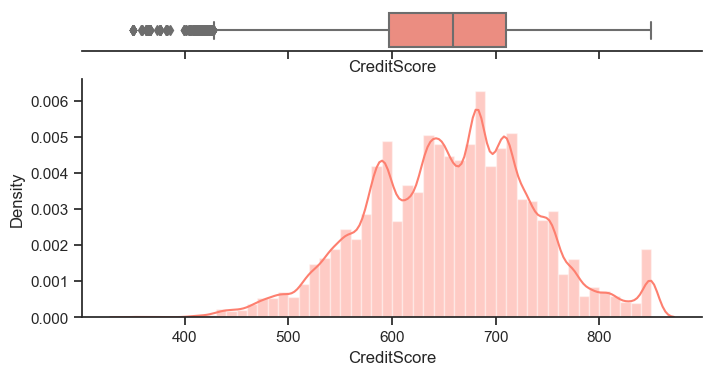

In [11]:
cont_dist(df_train_copy, 'CreditScore')

Insights & Observations 
- Appears to have multimodal distribution - will consider segmenting the customer base
- Slightly skewed to the left indicating presence of customers with lower credit scores (though seem relatively few in number) - will consider transforming  
- Spike in density around the max credit score (850)
- CreditScore provides insight into financial health and risk profiles of the customers - might reflect customers' financial stability and satisfaction with the bank's services, therefore influencing their decision to stay with or leave the bank - will consider using in a financial stability metric 



#### Age

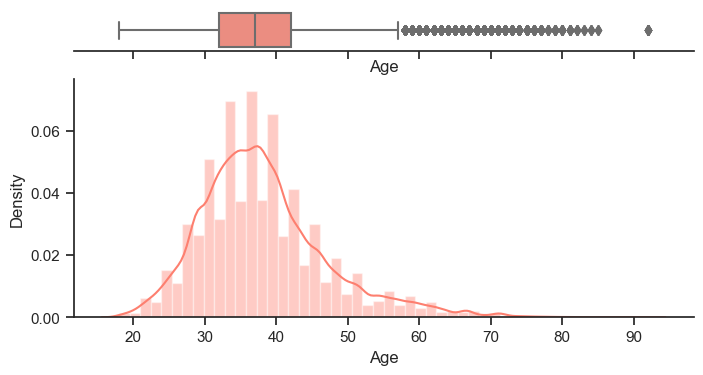

In [12]:
cont_dist(df_train_copy, 'Age')

Insights & Observations
- Right-skewed distribution, which a higher concentration of younger customers and a tail extending into older ages - will consider a transformation 
- Late 20s and early-mid 30s represents a significant portion of customer base - might make sense to segment the customers into age groups as age-related features might help capture different behaviours across customer life stages (e.g., younger customers might be more prone to switching services due to seeking better deals or being less established with the bank, whereas older customers might value stability and have a longer-standing relationship with the bank) 
- Quite a lot of outliers at older ages which might indicate specific segments of customer base

#### Balance

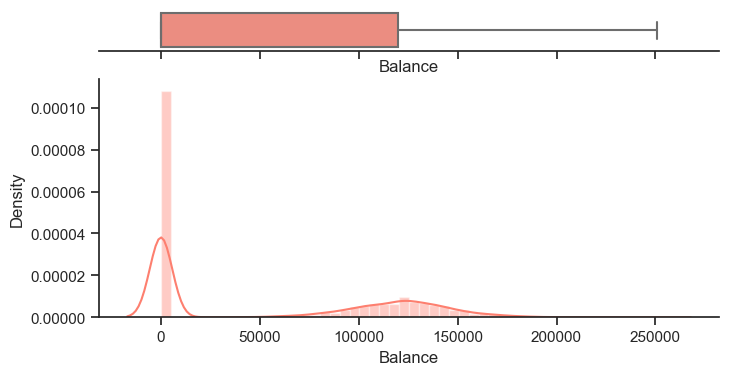

In [13]:
cont_dist(df_train_copy, 'Balance')

In [14]:
zero_balance_count = (df_train_copy['Balance'] == 0).sum()
total_count = df_train_copy.shape[0]
zero_balance_percentage = (zero_balance_count / total_count) * 100
print(zero_balance_percentage)

54.320927808815156


Insights & Observations
- Appears to have a bi-modal distribution with one significant peak at 0 and another broader peak around 100-150k range - might make sense to segment customers 
- A significant portion of customers have a balance close to 0 which could indicate that the bank is not the customer's primary bank or they are experiencing financial instability - will consider using to create a financial stability metric 
- Over half of the customers have 0 balances 


#### EstimatedSalary

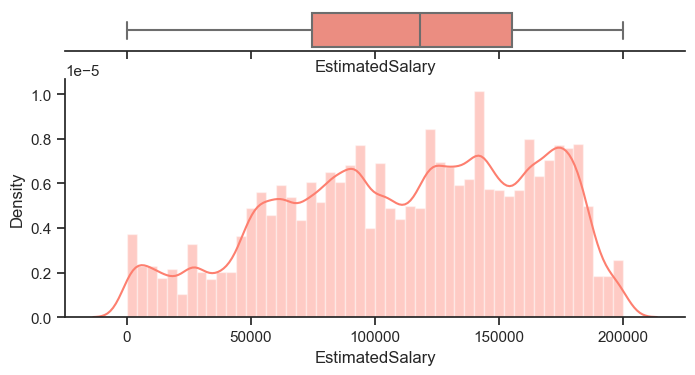

In [15]:
cont_dist(df_train_copy, 'EstimatedSalary')

Insights & Observations
- Kind of uniform distribution with small fluctuations, indicating that customers' estimated salaries vary widely without a dominant concentration in a specific range 
- Broad spread of customer salaries - will normalize or standardize 
- Uniform distribution suggests that EstimatedSalary might not be a strong predictor for churn on its own - might make sense to analyze interactions with other features which might yield more meaningful insights into churn - consider using to create a financial stability metric

#### Tenure

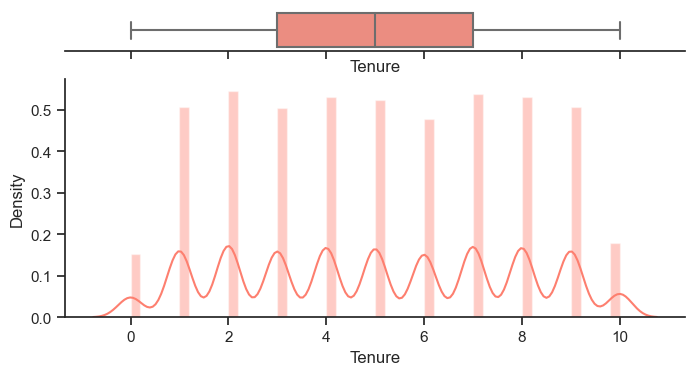

In [16]:
cont_dist(df_train_copy, 'Tenure')

Insights & Observations
- Quite uniform distribution across 0 to 10 years range - might normalize or standardize
- Seems to be in whole years
- Tenure by itself might not show a strong direct correlation with churn but combining it with other features might - will consider using to create a loyalty metric 

#### NumOfProducts

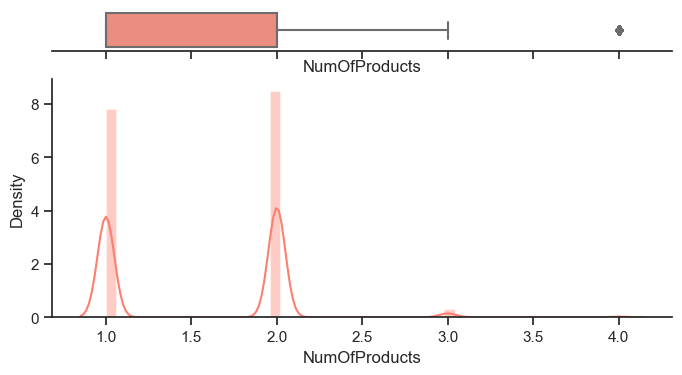

In [17]:
cont_dist(df_train_copy, 'NumOfProducts')

Insights & Observations
- Discrete distribution with two primary peaks at 1 and 2 products - might convert to categorical variable
- Customers with 3+ products might exhibit different loyalty patterns compared to those who only use 1 or 2 products 
- NumOfProducts could be a significant feature for predicting churn as the number of products a customer uses might correlate with their engagement level and satisfaction with the bank - will consider using in an engagment/satisfaction metric 

#### HasCrCard and IsActiveMember

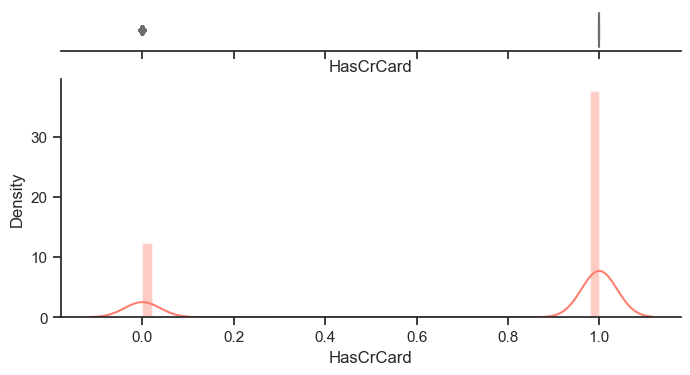

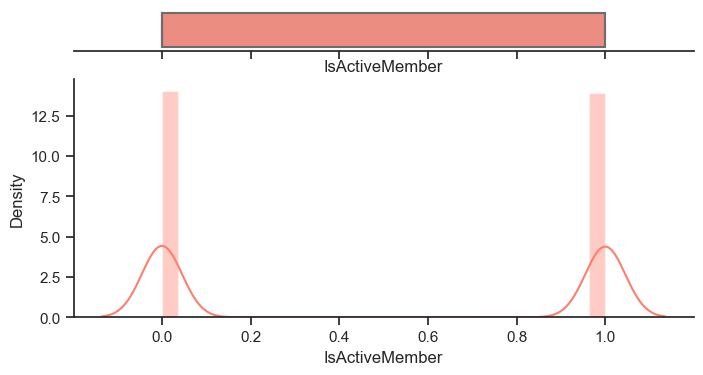

In [18]:
for i in ['HasCrCard', 'IsActiveMember']:
    cont_dist(df_train_copy, i)

Insights & Observations
- HasCrCard and IsActiveMember are both binary variables - might convert to categorical variables
- A higher portion of customers have a credit card compared to those who don't
- The number of active members is relatively balanced between active and inactive members
- Understanding how HasCrCard and IsActiveMember influences churn could provide actionable insights (significant weights on these features might indicate that they are key determinants of customer loyalty and satisfaction) - will consider using to create a loyalty and customer engagement/satisfaction


<a id='UnivariateCategorical'></a>
## 4.2 Univariate Analysis - Categorical Variables

#### Gender

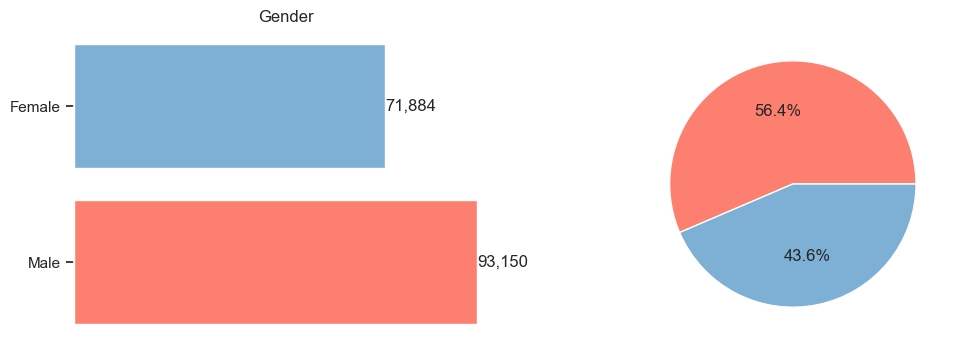

In [19]:
cat_dist(df_train_copy, 'Gender')

Insights & Observations
- Slightly imbalanced class with the majority being male 
- Categorical variable so will need to encode

#### Geography

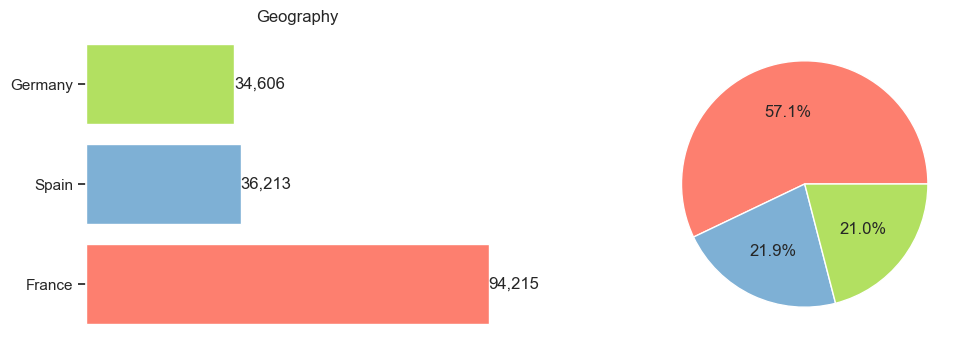

In [20]:
cat_dist(df_train_copy, 'Geography')

Insights & Observations 
- France has significantly more customers than Germany or Spain - need to ensure the model doesn't overfit characteristics of the dominant French market at the expense of generalizability to Germany and Spain
- Different countries may have different customer behaviour patterns, economic conditions, and competition levels that influence churn rates 
- Categorical variable so will need to encode

<a id='BivariateTarget'></a>
## 4.3 Bivariate Analysis - Features and Target

#### CreditScore and Exited

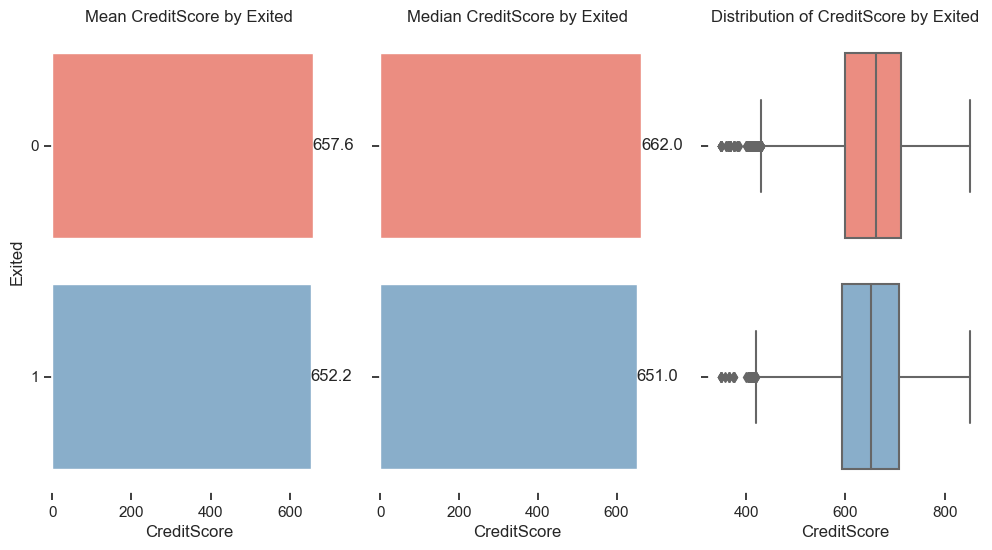

In [21]:
cat_cont_dist(df_train_copy, 'Exited', 'CreditScore')

Insights & Observations
- The mean and median CreditScores of customer who exited versus those who did not are relatively close which indicates that CreditScore alone might not be a strong predictor of churn 
- Both boxplots show a similar range and similar outliers - doesn't appear to be a signigicant difference in the spread of credit scores between those who exited and those who didn't
- The credit scores of customers who exited versus those who didn't show very similar statistical profiles which suggests that CreditScore alone may not be a decisive factor in predicting churn 

#### Age and Exited

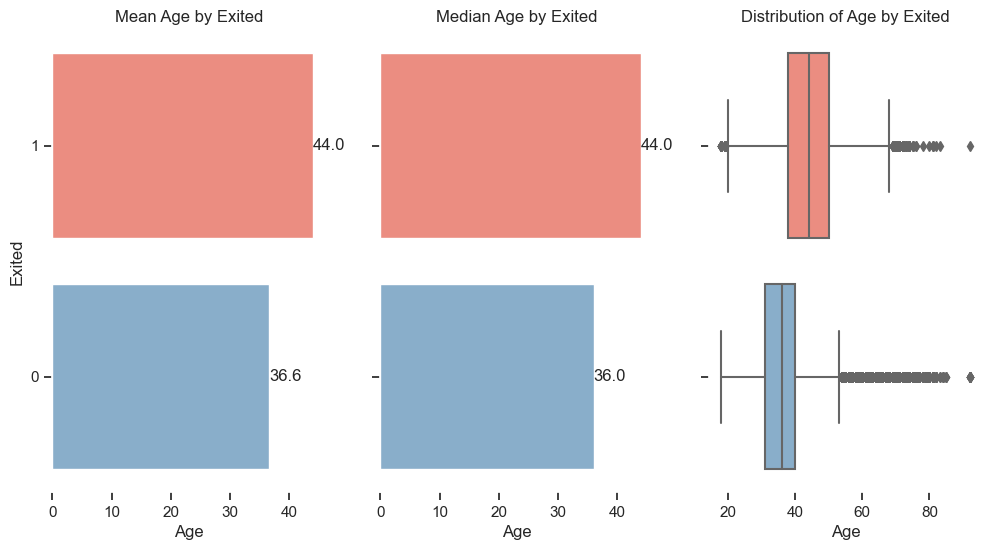

In [22]:
cat_cont_dist(df_train_copy, 'Exited', 'Age')

Insights & Observations
- Customers who exited have a higher mean and median than those who stayed, suggesting older customers are more likely to churn on average (which is not what I was expecting) 
- Customers who stayed show a narrower IQR centered around a younger age group, indicating less variability in age among retained customers
- Customers who exited show a wider IQR centered around an older age, suggesting a broader spread of ages among churned customers but generally skewed towards older individuals 
- Both distributions show outliers with the churned group showing outliers on both the lower and higher ends suggestion younger customers also churn but the majority are older
- The analysis indicates that age is quite a significant factor in customer churn, with older customers being more likely to leave which could be due to changing financial needs, disatisfaction with services, or better offerings from competitors targeting older demographics 

#### Balance and Exited

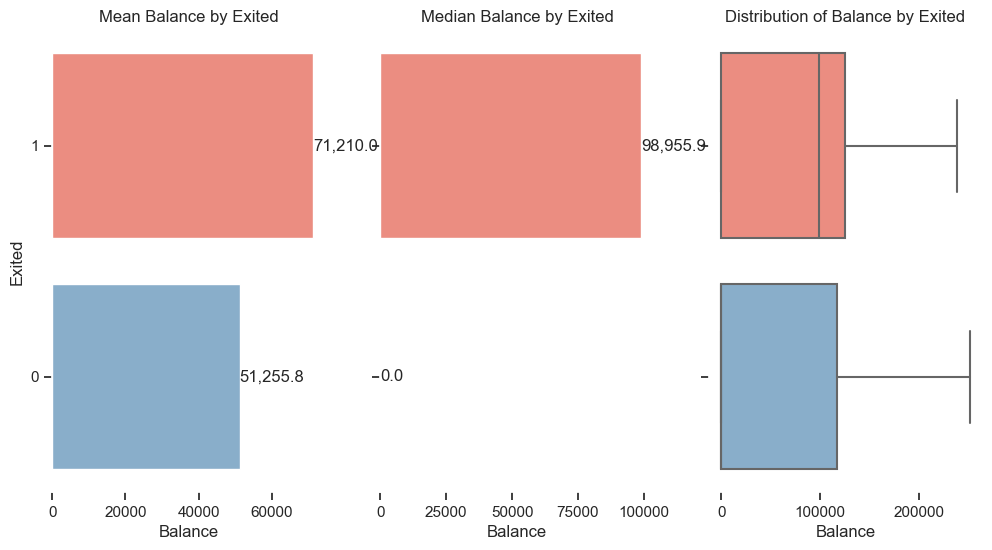

In [23]:
cat_cont_dist(df_train_copy, 'Exited', 'Balance')

Insights & Observations 
- On average, customers who churn tend to have higher balances that those who did not 
- The median balance for churned customers is significantly higher than the mean which is somewhat unexpected 
- The median balance for retained customers is 0, which suggests potential issues with the data - will be cautious using Balance as a predictor

#### NumOfProducts and Exited

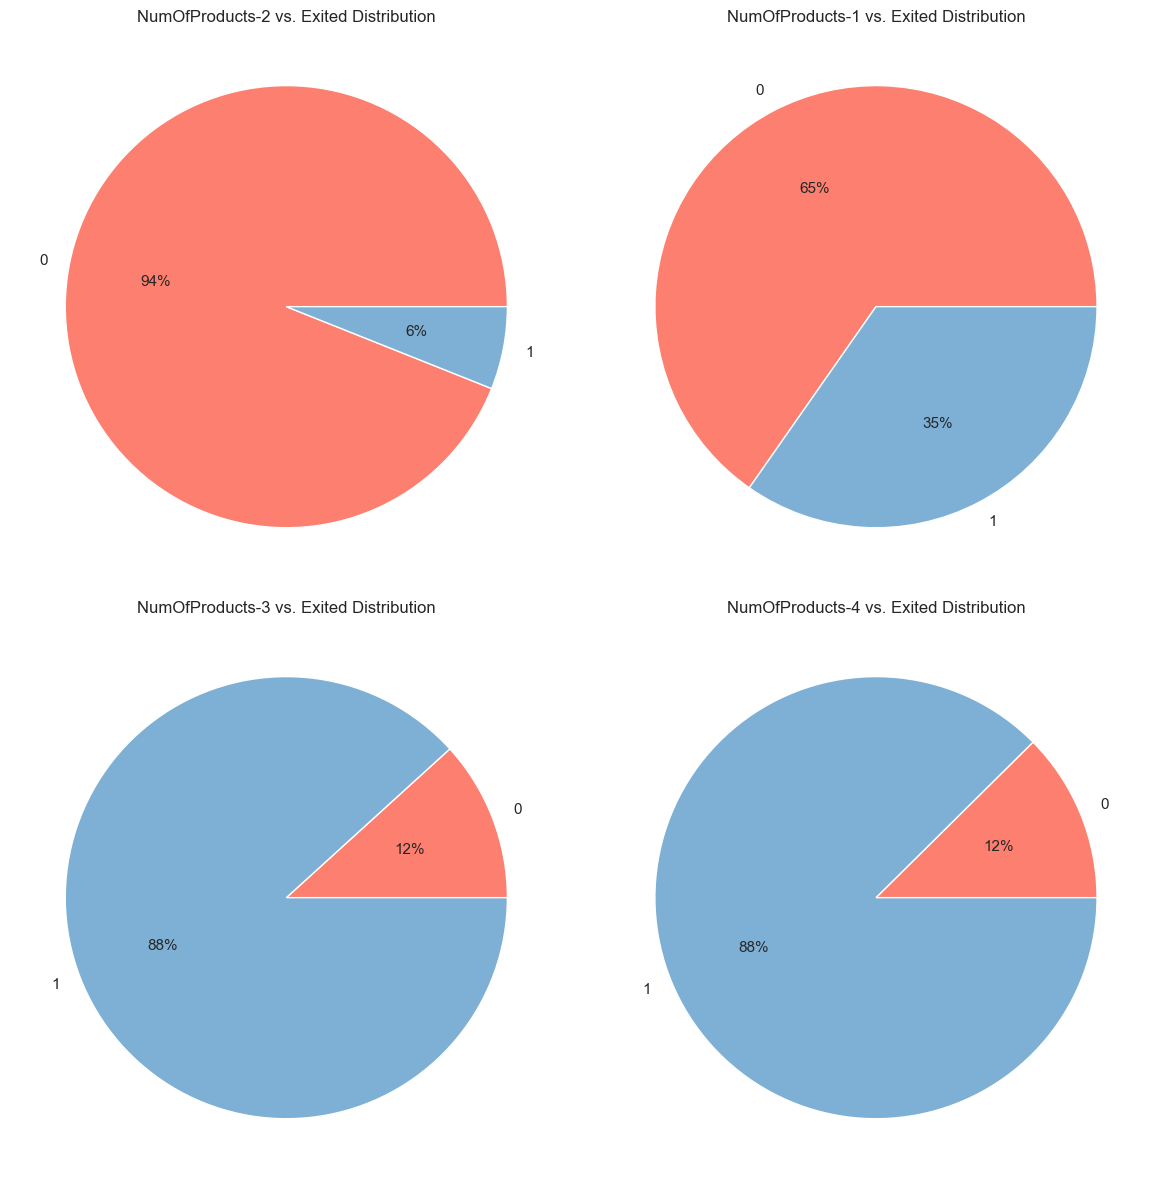

In [24]:
cat_target_dist(df_train_copy, 'Exited', 'NumOfProducts')

Insights & Observations
- Customers with fewer products (1 or 2) have lower churn rates compared to those with more products (3 to 4, though there is quite a significant decrease in churn rate when customers move from 1 product to 2 - this could possibly indicate diminishing returns beyond 2 products 


#### HasCrCard and Exited

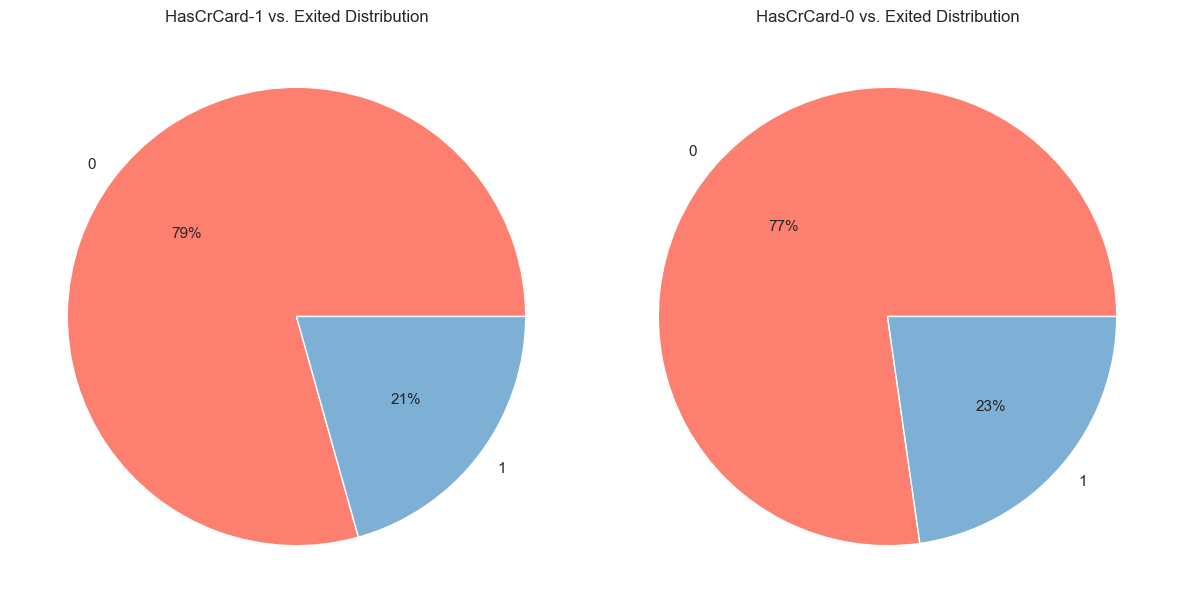

In [25]:
cat_target_dist(df_train_copy, 'Exited', 'HasCrCard')

Insights & Observations
- Having a credit card seems to be associated with a marginally lower churn rate, though the difference in churn rates is relatively small indicating that having a credit card is not a decisive factor by itself 

#### IsActiveMember and Exited

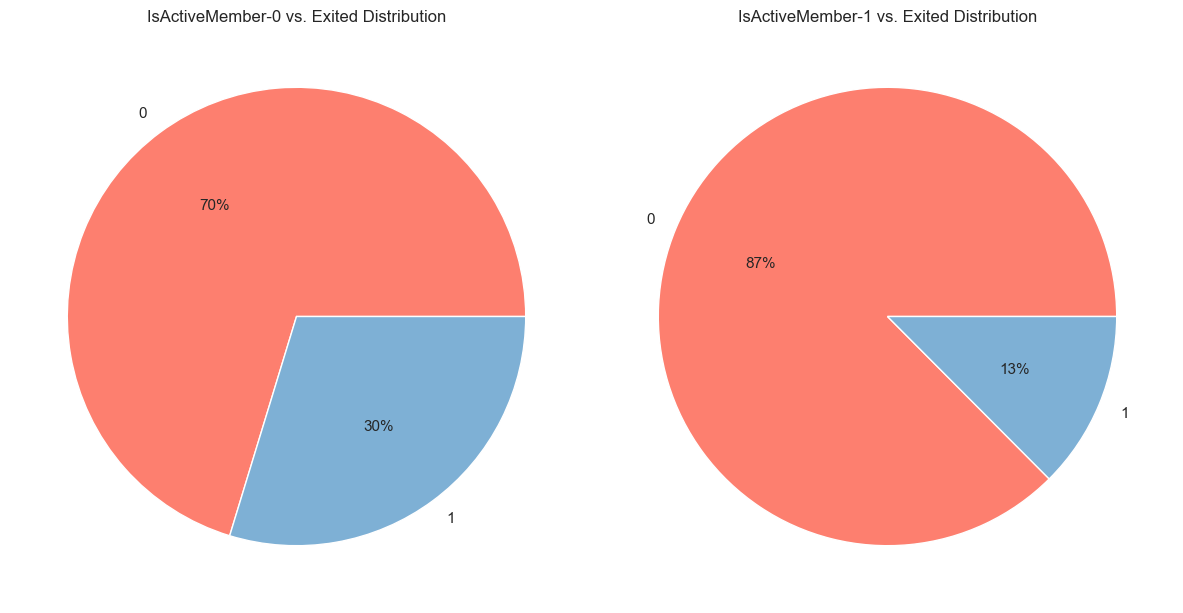

In [26]:
cat_target_dist(df_train_copy, 'Exited', 'IsActiveMember')

Insights & Observations
- Active member have a lower churn rate (13%) than inactive members suggesting that the feature could facilitate churn prediction

#### Gender and Exited

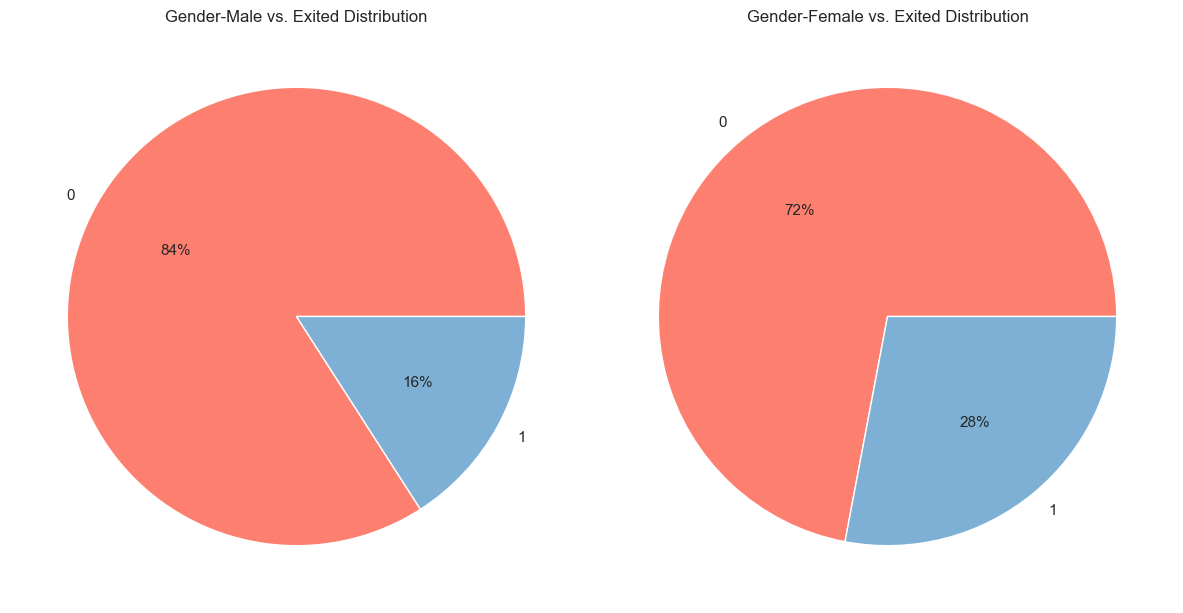

In [27]:
cat_target_dist(df_train_copy, 'Exited', 'Gender')

Insights & Observations
- Males have a lower churn rate than females 

#### Geography and Exited

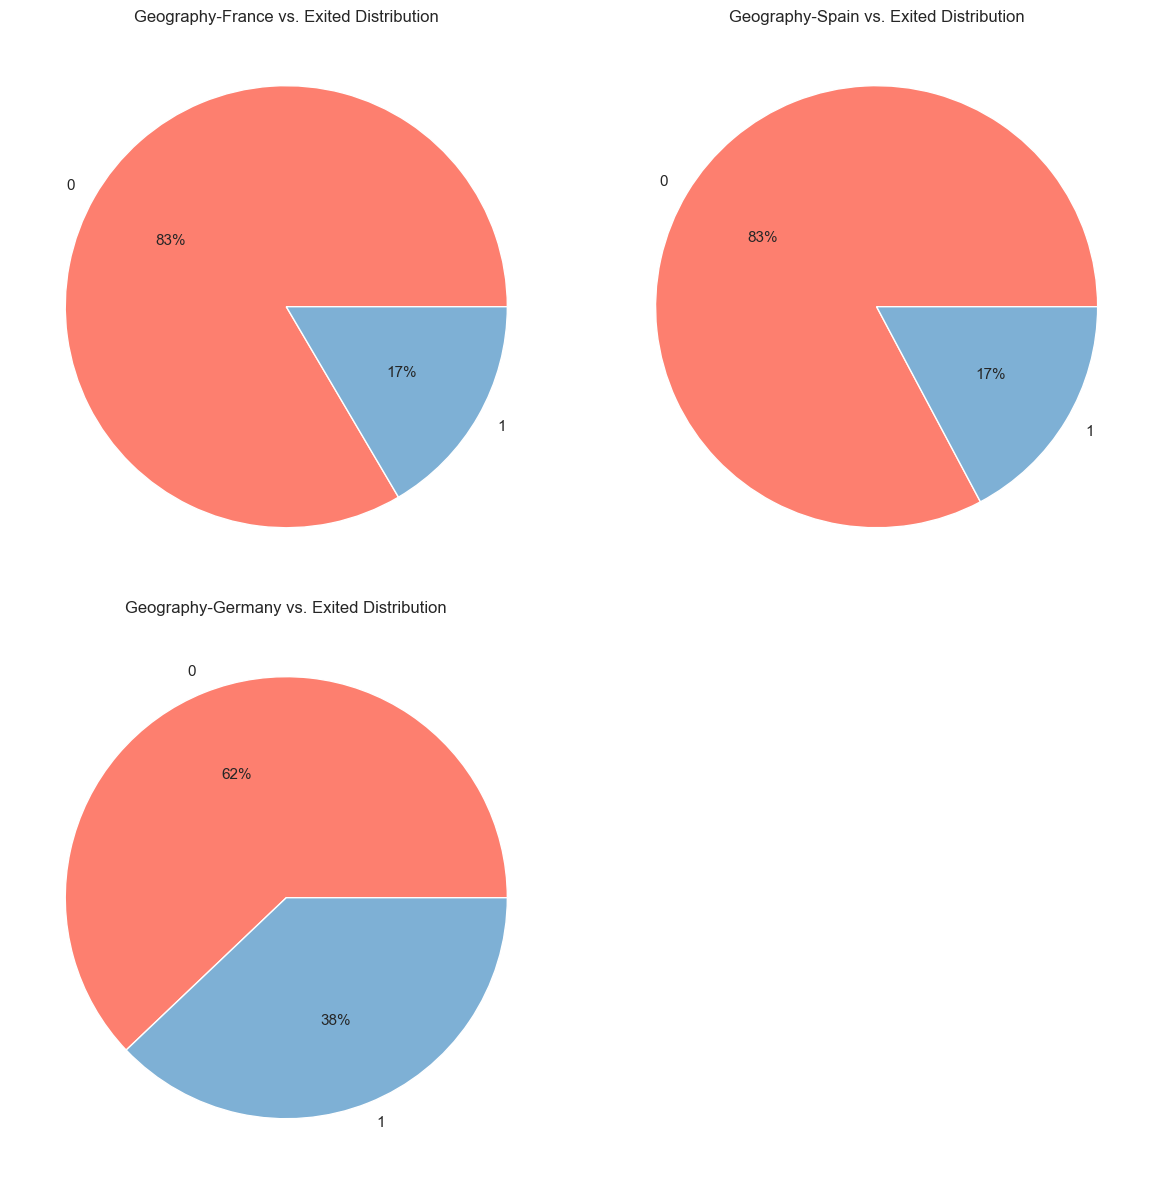

In [28]:
cat_target_dist(df_train_copy, 'Exited', 'Geography')

Insights and Observations
- Germany's churn rate is significantly higher than that of France's and Spain's

<a id='BivariateCorrelation'></a>
## 4.4 Bivariate Analysis - Feature Correlation

#### Scatter Plot

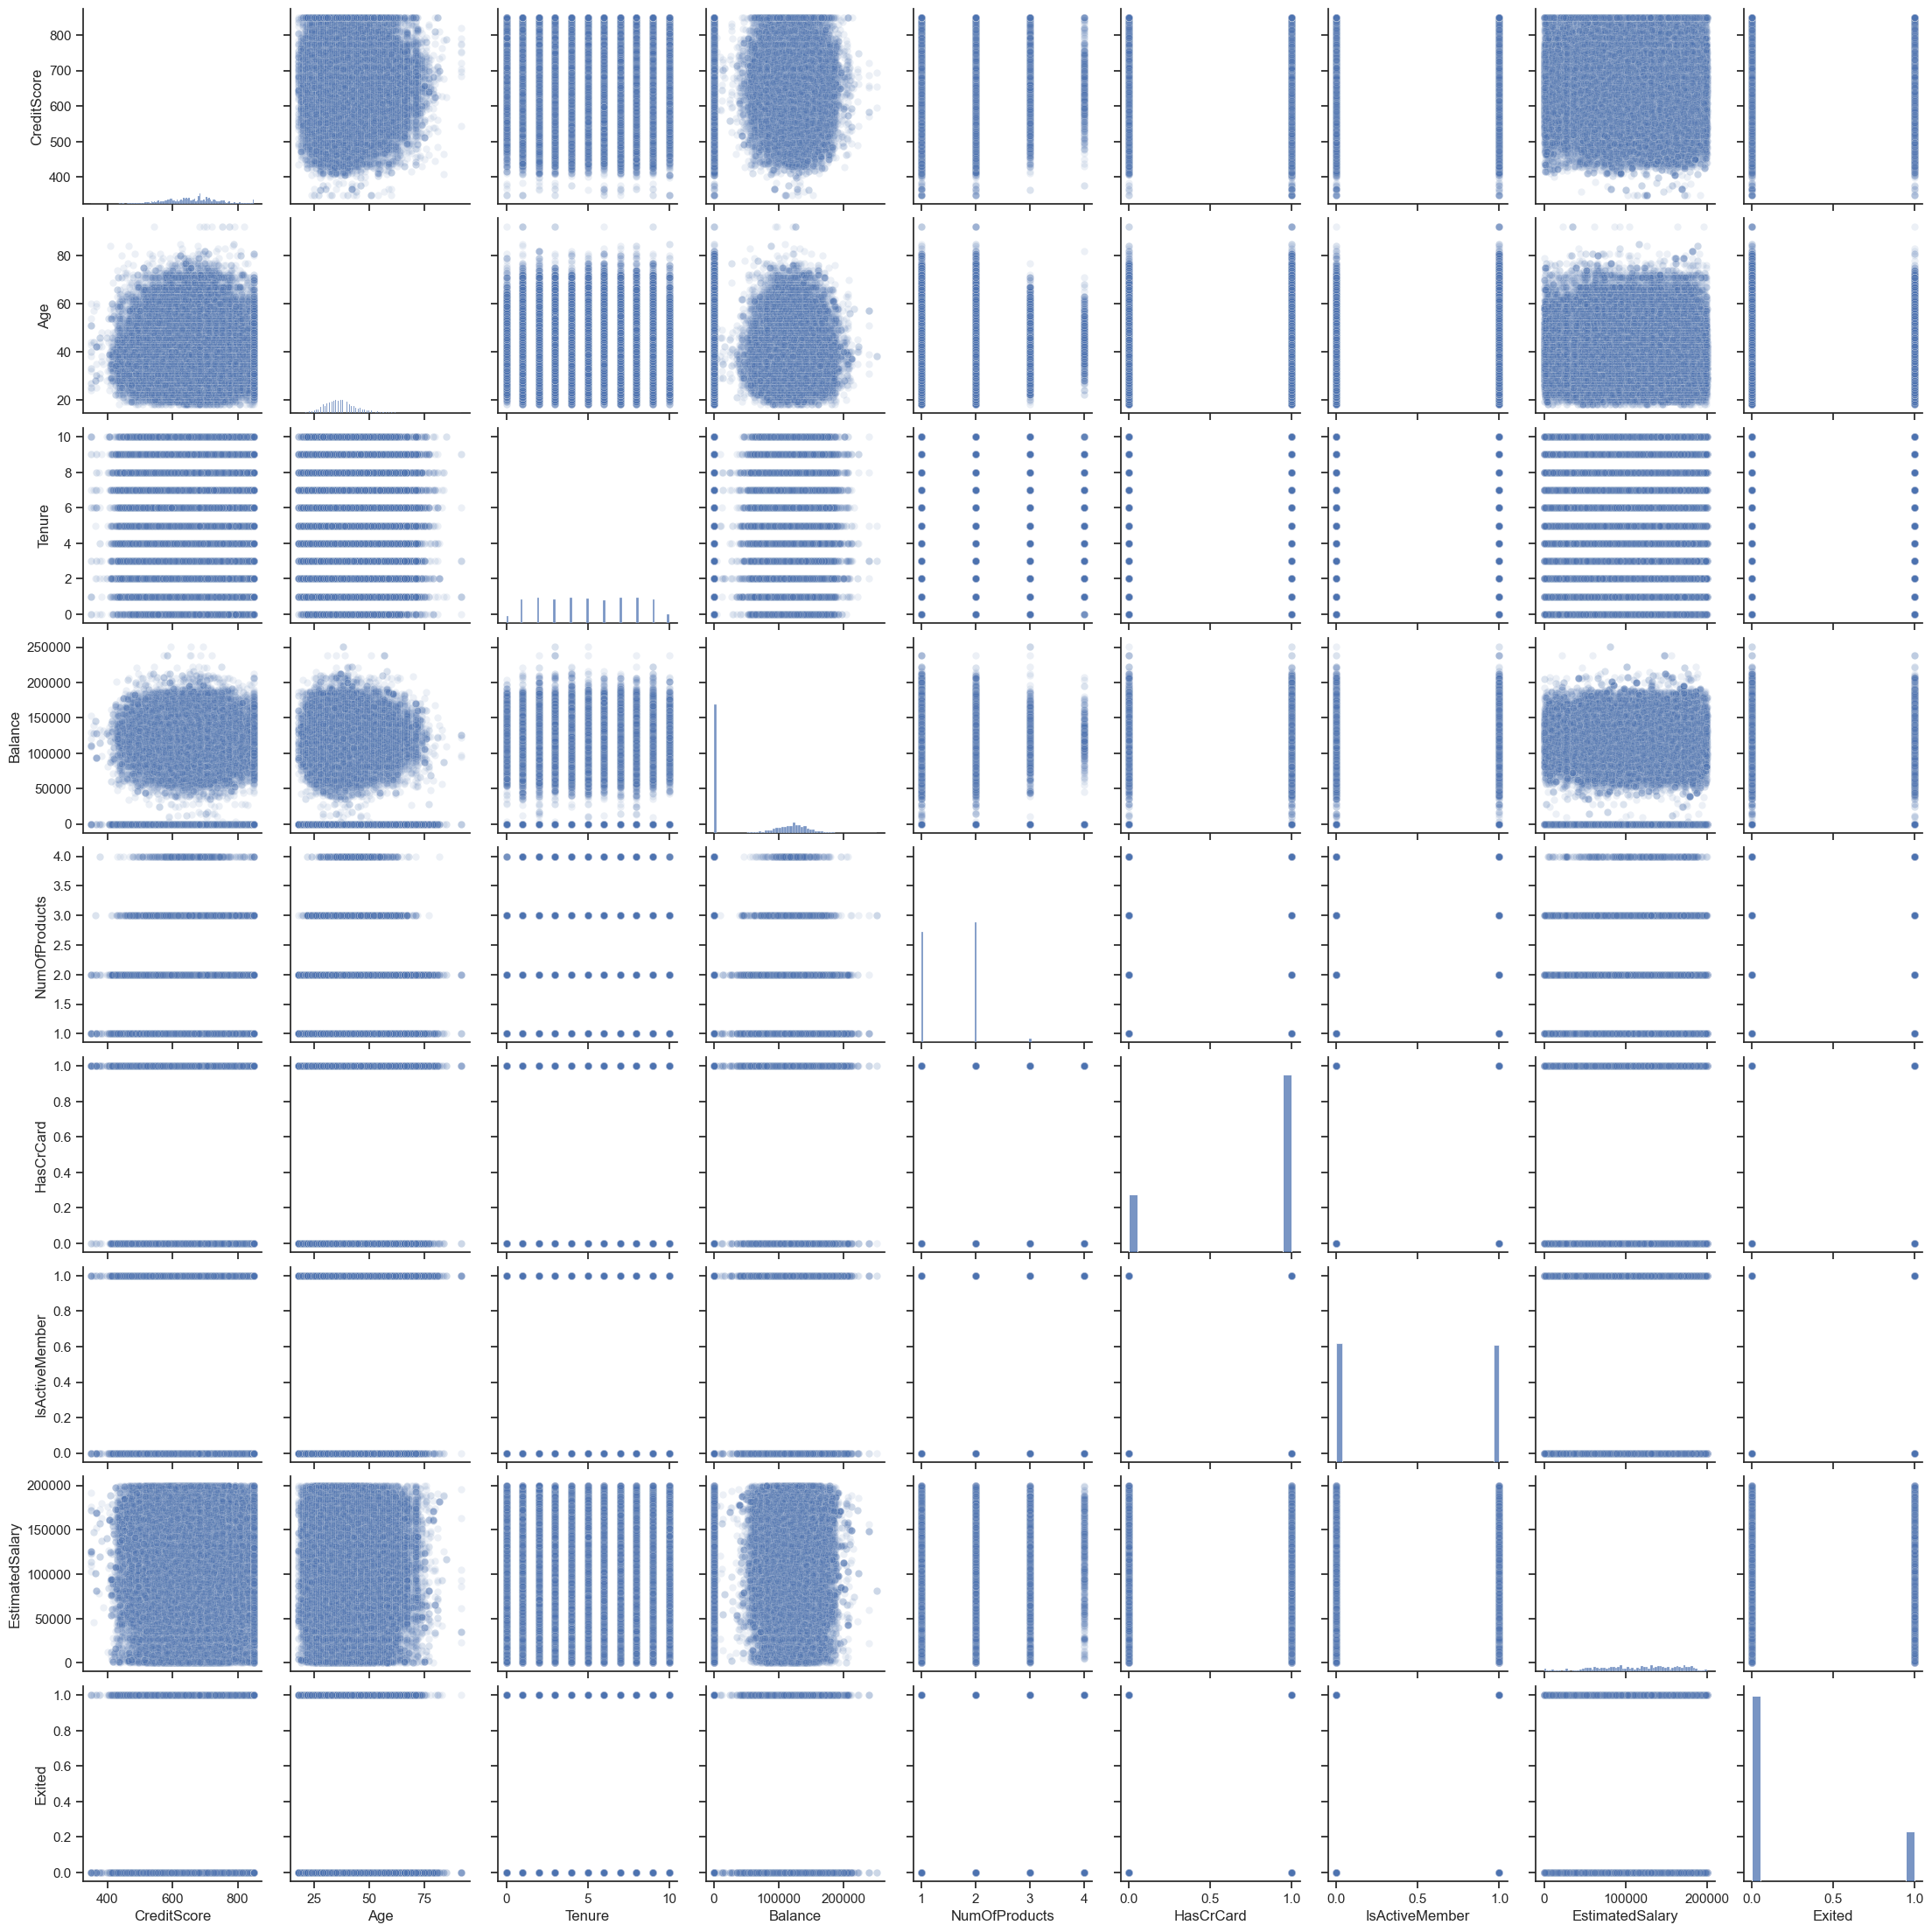

In [29]:
sns.pairplot(df_train_copy[cont_vars+[target_var]], kind='scatter', plot_kws={'alpha':0.1})

Insights & Observations 
- There are a lot of data points but there doesn't appear to be any clear cut relationships between variables

#### Correlation Heat Map

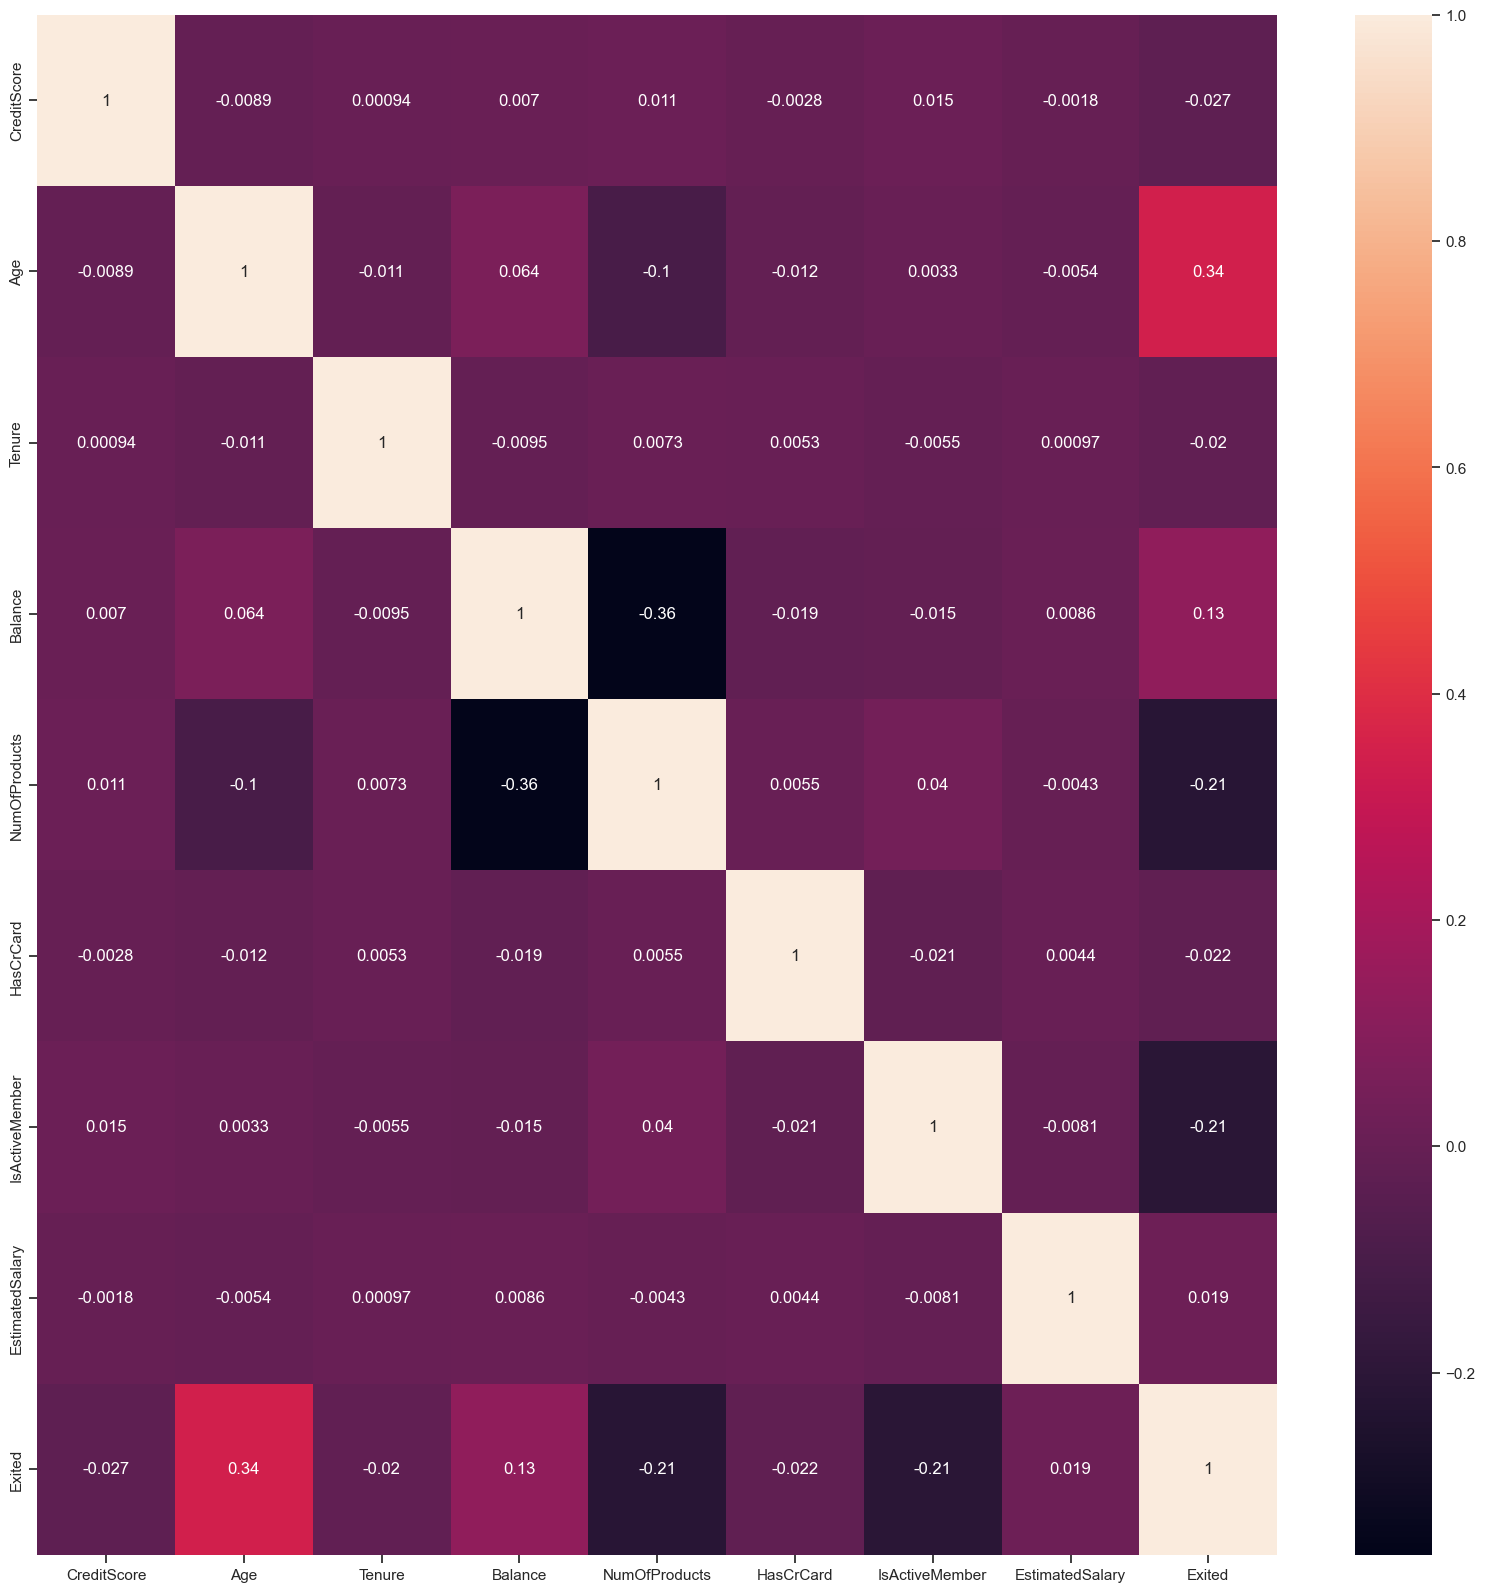

In [30]:
corr_heat_map(df_train_copy[cont_vars+[target_var]])

Insights & Observations 
- No features are highly correlated with each other so no multicollinearity 

<a id='Multivariate'></a>
## 4.5 Multivariate Analysis - Feature Interactions with Target

#### IsActiveMember and NumOfProducts on Exited

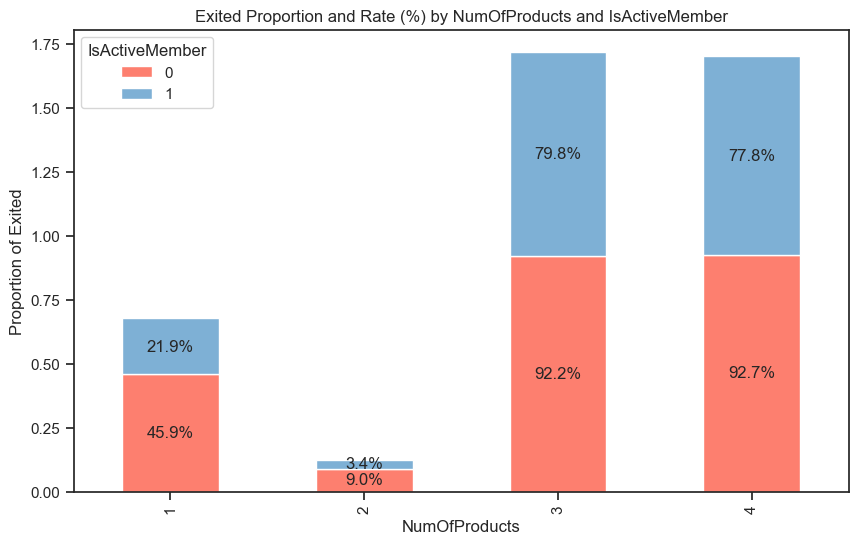

In [31]:
target_cat_cat_dist(df_train_copy, 'Exited', 'IsActiveMember', 'NumOfProducts')

Insights & Observations
- Churn rate skyrockets for customers with 3+ products, particularly for inactive members
- These features are important for predicting churn - adding an interaction variable might increase the model performance

#### CreditScore and EstimatedSalary on Exited

<Axes: xlabel='CreditScore', ylabel='EstimatedSalary'>

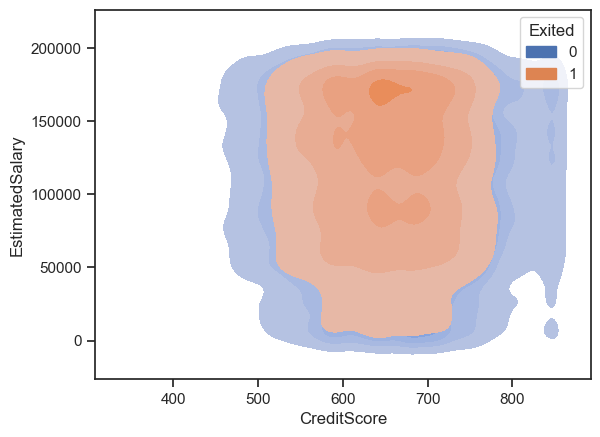

In [32]:
sns.kdeplot(data=df_train_copy, x='CreditScore', y='EstimatedSalary', hue='Exited', fill=True)


Insights & Observations
- Significant overlap in contours for customers who exited and customers who remained suggests that there is not a distinctly seperable pattern that clearly differentiates between those who exited vs. those who remained
- The wide spread contours, especially for customers who remained, incidate a broad distribution of CreditScores and EstimatedSalary among customers who remained
- There isn't a simple or direct relationship between CreditScore and EstimatedSalary, and the likelihood of exiting - will likely need more sophisticated modeling techniques to capture complex interactions

<a id='PreprocessData'></a>
# 5. Preprocessing

<a id='Split'></a>
## 5.1 Train-Test Split

In [33]:
# Split the features and the target
X = df_train_copy.iloc[:,:-1]
y = df_train_copy.iloc[:,-1:]

In [34]:
# Create a training and test set 
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.2, random_state=42)

<a id='FeatureScaling'></a>
## 5.2 Feature Scaling

In [35]:
# Class for feature scaling
class FeatureScaling(BaseEstimator, TransformerMixin):
    def __init__(self, features_to_scale=None, scaler_method='standard'):
        self.features_to_scale = features_to_scale
        self.scaler_method = scaler_method
        self.scalers = {}

    def fit(self, X, y=None):
        
        for feature in self.features_to_scale:
            if self.scaler_method == 'standard':
                self.scalers[feature] = StandardScaler()
            elif self.scaler_method == 'minmax':
                self.scalers[feature] = MinMaxScaler(feature_range = (0.01,1))
            elif self.scaler_method == 'maxabsscaler':
                self.scaler[feature] = MaxAbsScaler()
            elif self.scaler_method == 'robust':
                self.scaler[feature] = RobustScaler()
            self.scalers[feature].fit(X[[feature]]) 
            
        return self

    def transform(self, X):
        X_scaled = X.copy()
        for feature in self.features_to_scale:
            if feature in X_scaled.columns:
                X_scaled[feature] = self.scalers[feature].transform(X_scaled[[feature]])

        
        return X_scaled

<a id='FeatureEngineering'></a>
# 6. Feature Engineering

<a id='NewVariables'></a>
## 6.1 Create New Features

In [36]:
# Class for feature creation
class CreateNewFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, scale = False):
        self.scale = scale

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if self.scale == False:
            X['Loyalty'] = X['Tenure'] + X['HasCrCard'] + X['IsActiveMember']
            X['Satisfaction'] = X['NumOfProducts'] + X['IsActiveMember'] + X['HasCrCard']
            X['FinancialStability'] = X['Balance'] + X['CreditScore'] + X['EstimatedSalary']
            X['TenureAgeRatio'] = X['Tenure'].astype(float)/X['Age']
            X['NumOfProducts_IsActiveMember'] = X['NumOfProducts']*X['IsActiveMember']
        else:
            scaler = MinMaxScaler(feature_range = (0.01,1))
            X[['TenureScaled', 'HasCrCardScaled', 'IsActiveMemberScaled', 'NumOfProductsScaled', 'BalanceScaled', 'CreditScoreScaled', 'EstimatedSalaryScaled']] = scaler.fit_transform(X[['Tenure', 'HasCrCard', 'IsActiveMember', 'NumOfProducts', 'Balance', 'CreditScore', 'EstimatedSalary']]) 
            X['Loyalty'] = X['TenureScaled'] + X['HasCrCardScaled'] + X['IsActiveMemberScaled']
            X['Satisfaction'] = X['NumOfProductsScaled'] + X['IsActiveMemberScaled'] + X['HasCrCardScaled']
            X['FinancialStability'] = X['BalanceScaled'] + X['CreditScoreScaled'] + X['EstimatedSalaryScaled']
            X['TenureAgeRatio'] = X['Tenure'].astype(float)/X['Age']
            X['NumOfProducts_IsActiveMember'] = X['NumOfProducts']*X['IsActiveMember']
            X = X.drop(columns = ['TenureScaled', 'HasCrCardScaled', 'IsActiveMemberScaled', 'NumOfProductsScaled', 'BalanceScaled', 'CreditScoreScaled', 'EstimatedSalaryScaled'], axis = 1)
        
        return X

<a id='Encoding'></a>
## 6.2 One Hot Encoding

In [37]:
# Class for categorical encoding
class OHEncoding(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_encode = None):
        self.columns_to_encode = columns_to_encode
        self.encoders = {}
        
    def fit(self, X, y=None):
        if self.columns_to_encode is not None:
            for col in self.columns_to_encode:
                if col in X.columns:
                    oh_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
                    oh_encoder.fit(X[[col]])
                    self.encoders[col] = oh_encoder
                else:
                    raise ValueError(f"Column {col} not found in DataFrame")  

        return self

    def transform(self, X):
        X_encoded = X.copy()
        for col, encoder in self.encoders.items():
            encoded_col = encoder.transform(X_encoded[[col]])
            df_encoded = pd.DataFrame(encoded_col, columns=[f"{col}_{category}" for category in encoder.categories_[0]], index = X_encoded.index)
            X_encoded = pd.concat([X_encoded, df_encoded], axis=1)

        X_encoded = X_encoded.drop(columns = self.columns_to_encode, axis=1)

        return X_encoded

<a id='Transformations'></a>
## 6.3 Feature Transformations

In [38]:
# Class for feature transformations
class CustomTransformation(BaseEstimator, TransformerMixin):
    def __init__(self, feat_func):
#         self.func = func
        self.feat_func = feat_func

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_transformed = X.copy()
        if self.feat_func is not None:
            for i in self.feat_func:
                if self.feat_func[i] == 'log':
                    X_transformed[i+'_log'] = np.log1p(X_transformed[i])
                elif self.feat_func[i] == 'sqrt':
                    X_transformed[i+'_sqrt'] = np.sqrt(X_transformed[i])
                else:
                    X_transformed[i+'_bc'], _ = boxcox(X_transformed[i]+1)
                
            X_transformed = X_transformed.drop(columns = list(self.feat_func.keys()), axis = 1)

        return X_transformed


<a id='ModelSelection'></a>

# 7. Model Selection

<a id='AlgorithmSelection'></a>

## 7.1 Algorithm Selection

### Random Forest

In [39]:
rf_pipeline = Pipeline([
    ('encoder', OHEncoding(columns_to_encode = ['Gender', 'Geography'])),
    ('feature_creator', CreateNewFeatures(scale = True)),
    ('classifier', RandomForestClassifier())
])


In [40]:
predictors = [x for x in X_train.columns if x not in ['id', 'CustomerId', 'Surname']]

rf_scores = cross_val_score(rf_pipeline, X_train[predictors], y_train, cv=5, scoring='roc_auc')
print("Random Forest AUC: %0.4f (+/- %0.4f)" % (rf_scores.mean(), rf_scores.std() * 2))

Random Forest AUC: 0.8710 (+/- 0.0033)


### XGBoost

In [41]:
xgb_pipeline = Pipeline([
    ('encoder', OHEncoding(columns_to_encode = ['Gender', 'Geography'])),
    ('feature_creator', CreateNewFeatures(scale = True)),
    ('classifier', XGBClassifier())
])

In [42]:
xgb_scores = cross_val_score(xgb_pipeline, X_train[predictors], y_train, cv=5, scoring='roc_auc')
print("XGBoost AUC: %0.4f (+/- %0.4f)" % (xgb_scores.mean(), xgb_scores.std() * 2))

XGBoost AUC: 0.8849 (+/- 0.0040)


### LightGBM

In [43]:
lgbm_pipeline = Pipeline([
    ('encoder', OHEncoding(columns_to_encode = ['Gender', 'Geography'])),
    ('feature_creator', CreateNewFeatures(scale = True)),
    ('classifier', LGBMClassifier())
])

In [44]:
lgbm_scores = cross_val_score(lgbm_pipeline, X_train[predictors], y_train, cv=5, scoring='roc_auc')
print("LGBM AUC: %0.4f (+/- %0.4f)" % (lgbm_scores.mean(), lgbm_scores.std() * 2))

[LightGBM] [Info] Number of positive: 22373, number of negative: 83248
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001658 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1412
[LightGBM] [Info] Number of data points in the train set: 105621, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.211823 -> initscore=-1.313969
[LightGBM] [Info] Start training from score -1.313969
[LightGBM] [Info] Number of positive: 22372, number of negative: 83249
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001152 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1414
[LightGBM] [Info] Number of data points in the train set: 105621, number of used features: 18
[LightGBM] [Info

### CatBoost

In [45]:
cat_features = ['Geography', 'Gender', 'NumOfProducts', 'IsActiveMember', 'HasCrCard'] 

In [46]:
cb_pipeline = Pipeline([
    ('feature_creator', CreateNewFeatures(scale = True)),
    ('encoder', CatBoostEncoder(cols = cat_features)),
    ('classifier', CatBoostClassifier()),
])

In [47]:
cb_scores = cross_val_score(cb_pipeline, X_train[predictors], y_train, cv=5, scoring='roc_auc')
print("CatBoost AUC: %0.4f (+/- %0.4f)" % (cb_scores.mean(), cb_scores.std() * 2))

Learning rate set to 0.075349
0:	learn: 0.6249028	total: 76.5ms	remaining: 1m 16s
1:	learn: 0.5709931	total: 84ms	remaining: 41.9s
2:	learn: 0.5278661	total: 91.2ms	remaining: 30.3s
3:	learn: 0.4912332	total: 99.3ms	remaining: 24.7s
4:	learn: 0.4638078	total: 107ms	remaining: 21.4s
5:	learn: 0.4406232	total: 115ms	remaining: 19.1s
6:	learn: 0.4215169	total: 123ms	remaining: 17.5s
7:	learn: 0.4070692	total: 131ms	remaining: 16.3s
8:	learn: 0.3954813	total: 139ms	remaining: 15.3s
9:	learn: 0.3846837	total: 146ms	remaining: 14.5s
10:	learn: 0.3757234	total: 153ms	remaining: 13.8s
11:	learn: 0.3686460	total: 161ms	remaining: 13.2s
12:	learn: 0.3623941	total: 169ms	remaining: 12.8s
13:	learn: 0.3571206	total: 176ms	remaining: 12.4s
14:	learn: 0.3525021	total: 184ms	remaining: 12.1s
15:	learn: 0.3491908	total: 192ms	remaining: 11.8s
16:	learn: 0.3461750	total: 201ms	remaining: 11.7s
17:	learn: 0.3440413	total: 210ms	remaining: 11.4s
18:	learn: 0.3415932	total: 217ms	remaining: 11.2s
19:	lear

### Logistic Regression

In [48]:
new_cont_vars = X_train.select_dtypes(exclude = 'object').columns.tolist()
new_cont_vars.remove('id')
new_cont_vars.remove('CustomerId')

In [49]:
lr_pipeline = Pipeline([
    ('scaler', FeatureScaling(features_to_scale = new_cont_vars, scaler_method = 'minmax')),
    ('encoder', OHEncoding(columns_to_encode = ['Geography', 'Gender'])),
    ('feature_creator', CreateNewFeatures(scale = False)),
    ('feature_transformer', CustomTransformation(feat_func = {'Age':'boxcox'})),
    ('classifier', LogisticRegression())
])

In [50]:
lr_scores = cross_val_score(lr_pipeline, X_train[predictors], y_train, cv=5, scoring='roc_auc')
print("Logistic Regression AUC: %0.4f (+/- %0.4f)" % (lr_scores.mean(), lr_scores.std() * 2))

Logistic Regression AUC: 0.8201 (+/- 0.0056)


Insights & Observations 
- XGBoost, LGBM and CatBoost have the top 3 scores for Area Under the ROC Curve

<a id='ModelSelection2'></a>

## 7.2 Model Selection 

<a id='Pipelines'></a>
### 7.2.1 Pipelines and Datasets 

In [51]:
feature_engineering_pipeline = Pipeline(steps=[
    ('encoder', OHEncoding(columns_to_encode = ['Gender', 'Geography'])),
    ('feature_creator', CreateNewFeatures(scale = True)),
])

In [52]:
X_train_f = feature_engineering_pipeline.fit_transform(X_train)
X_cv_f = feature_engineering_pipeline.fit_transform(X_cv)


In [53]:
predictors = [x for x in X_train_f.columns if x not in ['id', 'CustomerId', 'Surname']]

<a id='ModelEvaluation'></a>

### 7.2.2 Top 3 Model Evaluation and Selection

In [54]:
def initial_tune_and_evaluate_classifiers(X, y):
    # Define the classifiers and their parameter grids
    classifiers = {
        'XGBClassifier': (XGBClassifier(use_label_encoder=False, eval_metric='logloss'), 
                          {'n_estimators': [100, 200], 'max_depth': [5, 10], 'learning_rate': [0.01, 0.1, 0.3]}),
        'LGBMClassifier': (LGBMClassifier(), 
                           {'n_estimators': [100, 200], 'max_depth': [-1, 10], 'learning_rate': [0.01, 0.1, 0.3]}),
        'CatBoostClassifier': (CatBoostClassifier(verbose=0), 
                               {'iterations': [100, 200], 'depth': [5, 10], 'learning_rate': [0.01, 0.1, 0.3]})
    }
    
    best_models_acc = {}
    best_models_auc = {}
#     best_models_f1 = {}
    best_scores_acc = {}
    best_scores_auc = {}
#     best_scores_f1 = {}


    # Iterate over classifiers
    for name, (model, params) in classifiers.items():
        grid_search_acc = GridSearchCV(model, params, cv=5, scoring='accuracy', n_jobs=-1)
        grid_search_acc.fit(X, y)
        
        best_models_acc[name] = grid_search_acc.best_estimator_
        best_scores_acc[name] = grid_search_acc.best_score_

        
        grid_search_auc = GridSearchCV(model, params, cv=5, scoring='roc_auc', n_jobs=-1)
        grid_search_auc.fit(X, y)
        
        best_models_auc[name] = grid_search_auc.best_estimator_
        best_scores_auc[name] = grid_search_auc.best_score_       
        
        
#         grid_search_f1 = GridSearchCV(model, params, cv=5, scoring='f1', n_jobs=-1)
#         grid_search_f1.fit(X, y)
        
#         best_models_f1[name] = grid_search_f1.best_estimator_
#         best_scores_f1[name] = grid_search_f1.best_score_       
        
        
             
        
        
        
    # Determine the best overall classifier and parameters
    best_classifier_acc = max(best_scores_acc, key=best_scores_acc.get)
    best_classifier_auc = max(best_scores_auc, key=best_scores_auc.get)
#     best_classifier_f1 = max(best_scores_f1, key=best_scores_f1.get)

    print(f"Best Classifier ACC: {best_classifier_acc}")
    print(f"Best Cross-Validation Score ACC: {best_scores_acc[best_classifier_acc]}")
    print(f"Best Parameters ACC: {best_models_acc[best_classifier_acc].get_params()}")

    
    print(f"Best Classifier AUC: {best_classifier_auc}")
    print(f"Best Cross-Validation Score AUC: {best_scores_auc[best_classifier_auc]}")
    print(f"Best Parameters AUC: {best_models_auc[best_classifier_auc].get_params()}")

#     print(f"Best Classifier F1: {best_classifier_f1}")
#     print(f"Best Cross-Validation Score F1: {best_scores_f1[best_classifier_f1]}")
#     print(f"Best Parameters F1: {best_models_f1[best_classifier_f1].get_params()}")
    
    
    print("ACC: ", best_models_acc, best_scores_acc)
    print("AUC: ", best_models_auc, best_scores_auc)   
#     print("F1: ", best_models_f1, best_scores_f1)

In [ ]:
initial_tune_and_evaluate_classifiers(X_train_f[predictors], y_train)

Insights & Observations 
- The CatBoost model with the following parameters had the best AUC score: iterations = 100, learning_rate = 0.1, depth = 5, verbose = 0

<a id='Tuning'></a>
## 7.3 Hyperparameter Tuning

<a id='FitEvaluate'></a>
### 7.3.1 Function to Fit and Evaluate Model with Cross-validation Data

In [55]:
def modelfit(alg, X_train, y_train, X_cv, y_cv, predictors, useTrainCV=True, cv_folds=5, early_stopping_rounds=300):
    
    if useTrainCV:
#         X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.2, random_state=42)

        pool_train = cb.Pool(X_train, label = y_train)
        pool_cv = cb.Pool(X_cv, label = y_cv)
        
        params = alg.get_params()
        params['eval_metric'] = 'AUC:hints=skip_train~false'
#         params['iterations'] = params.get('iterations', 1000)
        params['loss_function'] = 'Logloss'
        cvresult = cb.cv(pool=pool_train, params=params, fold_count=cv_folds,
                         early_stopping_rounds=early_stopping_rounds, 
                         plot=True, verbose=False)
        
        best_iteration = cvresult['test-AUC-mean'].argmax()
        alg.set_params(iterations=best_iteration)
        
        
        # Fit the algorithm on the data
        alg.fit(pool_train, eval_set = pool_cv, early_stopping_rounds=early_stopping_rounds, use_best_model=True)

        # Predict training set:
        dtrain_predictions = alg.predict(X_train)
        dtrain_predprob = alg.predict_proba(X_train)[:, 1]

        # Predict cv set:
        dcv_predictions = alg.predict(X_cv)
        dcv_predprob = alg.predict_proba(X_cv)[:, 1]
        
        
        # Print model report:
        print("\nModel Report")
        print("Accuracy : %.4g" % metrics.accuracy_score(y_train, dtrain_predictions))
        print("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, dtrain_predprob))
        print("Best iteration: ", best_iteration)

        
        # Print model report:
        print("\nModel ReportCV")
        print("Accuracy : %.4g" % metrics.accuracy_score(y_cv, dcv_predictions))
        print("AUC Score (Train): %f" % metrics.roc_auc_score(y_cv, dcv_predprob))
        print("Best iteration: ", best_iteration)
        
        
        # Feature importance
        feat_imp = pd.Series(alg.get_feature_importance(), index=predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

<a id='ControlModel'></a>
### 7.3.2 Control Model

In [ ]:
cat_features = ['Geography', 'Gender', 'NumOfProducts', 'IsActiveMember', 'IsActive_by_CreditCard', 'HasCrCard', 'Loyalty', 'Satisfaction'] 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.8914875076
bestIteration = 96

Training on fold [1/5]

bestTest = 0.8858744245
bestIteration = 99

Training on fold [2/5]

bestTest = 0.8834426392
bestIteration = 99

Training on fold [3/5]

bestTest = 0.8899144063
bestIteration = 99

Training on fold [4/5]

bestTest = 0.8910665433
bestIteration = 99


Model Report
Accuracy : 0.8651
AUC Score (Train): 0.889276
Best iteration:  99

Model ReportCV
Accuracy : 0.8667
AUC Score (Train): 0.890167
Best iteration:  99


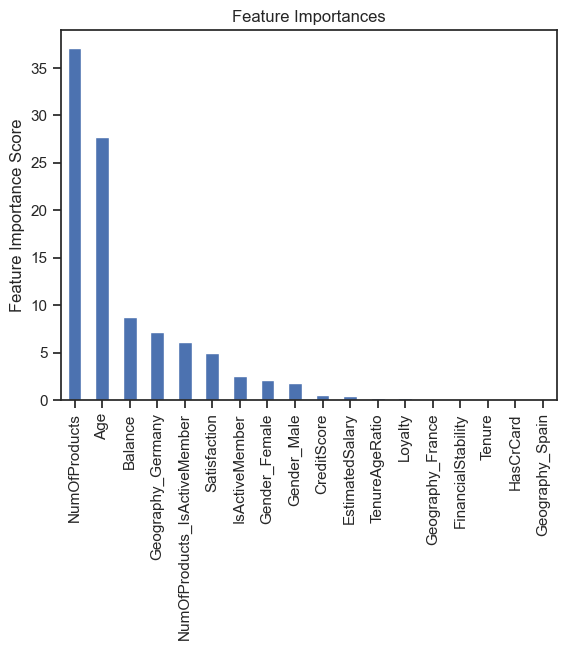

In [56]:
# encoder = CatBoostEncoder(cols = cat_features)
# encoder.fit(X_train, y_train)
# X_train_encoded.head()

cbc = CatBoostClassifier(
#     cat_features = cat_features_indices,
    iterations = 100, 
    learning_rate = 0.1, 
    depth = 5, 
    verbose = 0)

modelfit(cbc, X_train_f[predictors], y_train, X_cv_f[predictors], y_cv, predictors)

<a id='EstimatorsLearning'></a>
### 7.3.3 Fine Tuning iterations and learning_rate

In [57]:
param_test1 = {
    'iterations': (100, 200, 300, 500, 700, 1000),
    'learning_rate': (0.01, 0.03, 0.05, 0.1, 0.2)
}
gsearch1 = GridSearchCV(estimator = CatBoostClassifier(depth=5, verbose = 0), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=-1, cv=5)
gsearch1.fit(X_train_f[predictors],y_train)
gsearch1.best_params_, gsearch1.best_score_

({'iterations': 1000, 'learning_rate': 0.03}, 0.8890453808906678)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.8921767366
bestIteration = 991

Training on fold [1/5]

bestTest = 0.8865670487
bestIteration = 865

Training on fold [2/5]

bestTest = 0.884136058
bestIteration = 881

Training on fold [3/5]

bestTest = 0.8907805677
bestIteration = 666

Training on fold [4/5]

bestTest = 0.8913887084
bestIteration = 988


Model Report
Accuracy : 0.8687
AUC Score (Train): 0.894793
Best iteration:  991

Model ReportCV
Accuracy : 0.868
AUC Score (Train): 0.891147
Best iteration:  991


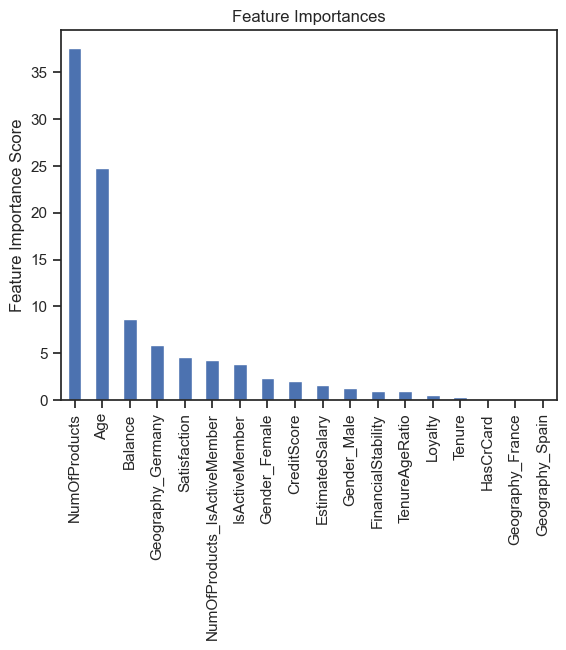

In [58]:
cb1 = CatBoostClassifier(
#     cat_features = cat_features_indices,
    iterations = 1000, 
    learning_rate = 0.03, 
    depth = 5, 
    verbose = 0)

modelfit(cb1, X_train_f[predictors], y_train, X_cv_f[predictors], y_cv, predictors)

In [59]:
param_test1a = {
    'iterations': (800, 1000, 1200),
    'learning_rate': (0.02, 0.03, 0.04)
}
gsearch1a = GridSearchCV(estimator = CatBoostClassifier(depth=5, verbose = 0), 
 param_grid = param_test1a, scoring='roc_auc',n_jobs=-1, cv=5)
gsearch1a.fit(X_train_f[predictors],y_train)
gsearch1a.best_params_, gsearch1a.best_score_

({'iterations': 1000, 'learning_rate': 0.03}, 0.8890453808906678)

<a id='DepthL2'></a>
### 7.3.4 Fine Tuning depth and l2_leaf_reg

In [60]:
param_test2 = {
    'depth': (4, 5, 6, 8, 10),
    'l2_leaf_reg': (1, 10, 100, 1000)
}
gsearch2 = GridSearchCV(estimator = CatBoostClassifier(iterations=1000, learning_rate = 0.03, verbose = 0), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=-1, cv=5)
gsearch2.fit(X_train_f[predictors],y_train)
gsearch2.best_params_, gsearch2.best_score_

({'depth': 6, 'l2_leaf_reg': 100}, 0.889052616618837)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.8924439577
bestIteration = 999

Training on fold [1/5]

bestTest = 0.8865943035
bestIteration = 957

Training on fold [2/5]

bestTest = 0.884240829
bestIteration = 996

Training on fold [3/5]

bestTest = 0.8910977027
bestIteration = 855

Training on fold [4/5]

bestTest = 0.8914842226
bestIteration = 998


Model Report
Accuracy : 0.8688
AUC Score (Train): 0.895215
Best iteration:  999

Model ReportCV
Accuracy : 0.8682
AUC Score (Train): 0.891283
Best iteration:  999


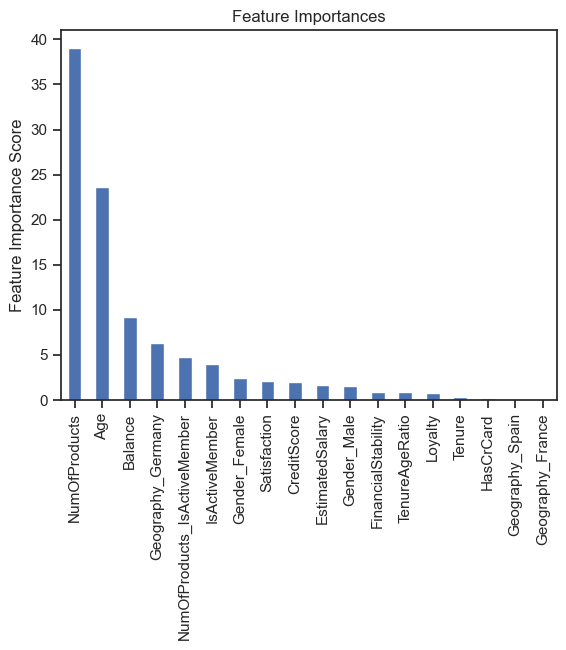

In [61]:
cb2 = CatBoostClassifier(
#     cat_features = cat_features_indices,
    iterations = 1000, 
    learning_rate = 0.03, 
    depth = 6, 
    l2_leaf_reg = 100, 
    verbose = 0)

modelfit(cb2, X_train_f[predictors], y_train, X_cv_f[predictors], y_cv, predictors)

In [62]:
param_test2a = {
    'depth': [5, 6, 7],
    'l2_leaf_reg': [50, 75, 100, 125, 150]
}
gsearch2a = GridSearchCV(estimator = CatBoostClassifier(iterations=1000, learning_rate = 0.03, verbose = 0), 
 param_grid = param_test2a, scoring='roc_auc',n_jobs=-1, cv=5)
gsearch2a.fit(X_train_f[predictors],y_train)
gsearch2a.best_params_, gsearch2a.best_score_

({'depth': 6, 'l2_leaf_reg': 75}, 0.8890537749604555)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.8923478382
bestIteration = 903

Training on fold [1/5]

bestTest = 0.8865764901
bestIteration = 738

Training on fold [2/5]

bestTest = 0.8842470703
bestIteration = 926

Training on fold [3/5]

bestTest = 0.8910815388
bestIteration = 942

Training on fold [4/5]

bestTest = 0.8914469207
bestIteration = 964


Model Report
Accuracy : 0.868
AUC Score (Train): 0.894417
Best iteration:  919

Model ReportCV
Accuracy : 0.8685
AUC Score (Train): 0.891185
Best iteration:  919


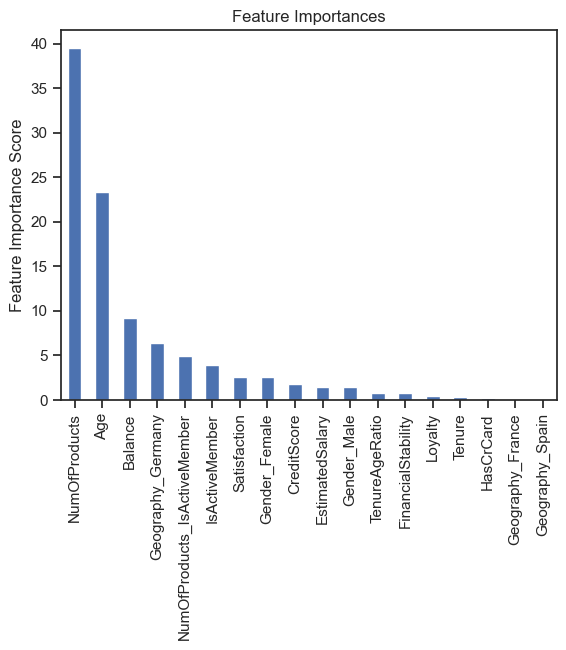

In [63]:
cb2a = CatBoostClassifier(
#     cat_features = cat_features_indices,
    iterations = 1000, 
    learning_rate = 0.03, 
    depth = 6, 
    l2_leaf_reg = 75, 
    verbose = 0)

modelfit(cb2a, X_train_f[predictors], y_train, X_cv_f[predictors], y_cv, predictors)

<a id='Predicting'></a>
# 8. Predictions

In [64]:
cb2a.fit(X_train_f[predictors], y_train)


In [66]:
#Predict training set:
train_predictions = cb2a.predict(X_train_f[predictors])
train_predprob = cb2a.predict_proba(X_train_f[predictors])[:,1]

#Predict val set:
cv_predictions = cb2a.predict(X_cv_f[predictors])
cv_predprob = cb2a.predict_proba(X_cv_f[predictors])[:,1]    



In [67]:
X_test_f = feature_engineering_pipeline.fit_transform(df_test_copy)


In [68]:
#Predict test set:
test_predictions = cb2a.predict(X_test_f[predictors])
test_predprob = cb2a.predict_proba(X_test_f[predictors])[:,1]    

In [69]:
id_list = df_test_copy['id'].tolist()
prob_list = []
# num_list = []


for i in range(len(test_predprob)):
    prob_list.append(test_predprob[i])
#     num_list.append(test_predictions[i])


df_final = pd.DataFrame({"id":id_list, "Exited":prob_list})

In [70]:
df_final.to_csv("Bank_Churn_Final4.csv")